# Basic Network Properties

**Github: https://github.com/bgbg/ML-on-Graphs**

## Download and extract the data


**Download link:**  
We are about to use the [Bitcoin OTC trust weighted signed network](https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html) dataset. 
This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research.


The dataset is available at the following link:
[https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz](https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz)

The compressed file is `soc-sign-bitcoinotc.csv.gz`, which extracts to `soc-sign-bitcoinotc.csv`.


In [1]:
import utils

In [2]:
url = "https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz"
zip_filename = "soc-sign-bitcoinotc.csv.gz"
local_folder = "./data"

csv_file_path = utils.download_and_extract_zip(
    zip_url=url,
    zip_filename=zip_filename,
    local_folder=local_folder,
    filetype="csv.gz",
)
csv_file_path

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.


'/Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/soc-sign-bitcoinotc.csv'

In [3]:
import pandas as pd

df = pd.read_csv(
    csv_file_path,
    header=None,
    names=["source", "target", "weight", "timestamp"],
)
df.head()

,source,target,weight,timestamp
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


As in the previous notebook, we will start with general, toy, examples, and then move to the real data.

# 1. Degree Distribution and Node Degree Properties

In this section, we will:
- Understand the concept of **node degree** (in-degree, out-degree for directed graphs)  
- Explore how to compute and visualize **degree distributions**  
- Discuss what a node’s degree can tell us about its importance in a network


## 1.1 What is Node Degree?

A node’s **degree** is the number of edges connected to it.
- In an **undirected** graph, a node’s degree is simply the number of neighbors.  
- In a **directed** graph, we have:
  - **In-degree**: The number of edges coming into a node  
  - **Out-degree**: The number of edges going out of a node  

**Degree distribution**: A frequency distribution of the degrees of all nodes in the graph. By plotting this distribution, we can observe patterns such as:
- Heavy-tailed (scale-free) distributions  
- Poisson-like (random) distributions  
- Bimodal or other shapes, depending on the network structure


We use the `erdos_renyi_graph` function to generate a random undirected graph.

Random graphs are useful in network analysis for comparing real-world networks to theoretical models. The choice of random graph model depends on the properties we wish to study.

The Erdős–Rényi model is one of the simplest random graph models. It is defined by:
- **n**: the number of nodes
- **p**: the probability of edge creation

To generate the graph:
- For each pair of nodes, we flip a coin with probability $p$ of adding an edge.
- The result is a random graph with $n$ nodes and edges appearing independently with probability $p$.

About Erdős and Rényi:
 - Paul Erdős was a prolific Hungarian mathematician known for his work in number theory, combinatorics, and graph theory.
 - Alfréd Rényi was a Hungarian mathematician who made significant contributions to probability theory and information theory.

Degrees of each node: [4, 5, 4, 4, 1, 2, 3, 3, 3, 5]


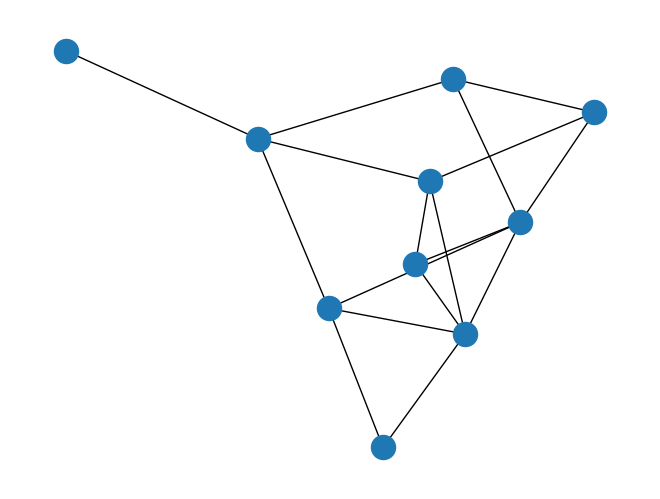

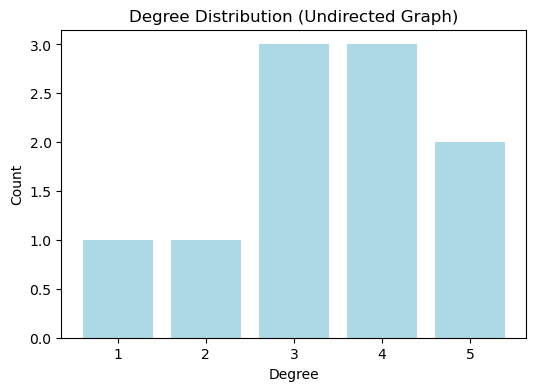

In [4]:
# 1.2 Practice Activity: Building and Visualizing a Degree Distribution

import networkx as nx
import matplotlib.pyplot as plt

# Create a random undirected graph (Erdős–Rényi model)
# n=10 nodes, p=0.3 probability of edge creation
G = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)
nx.draw(G)

# Compute the degree of each node
degrees = [deg for (node, deg) in G.degree()]

print("Degrees of each node:", degrees)

# Plot the degree distribution as a histogram
plt.figure(figsize=(6, 4))
plt.hist(
    degrees,
    bins=range(min(degrees), max(degrees) + 2),
    align="left",
    rwidth=0.8,
    color="lightblue",
)
plt.title("Degree Distribution (Undirected Graph)")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

### Observations

1. Look at the printed **list of degrees** in the console output:
   - Are there any nodes with degree 0 (isolated nodes)?  
   - Which node(s) have the highest degree?

2. The **histogram** shows how many nodes have a given degree value.  
   - If most nodes have degree 1 or 2, the network is relatively sparse.  
   - If a few nodes have significantly higher degree than others, those are potentially “hubs” in the network.


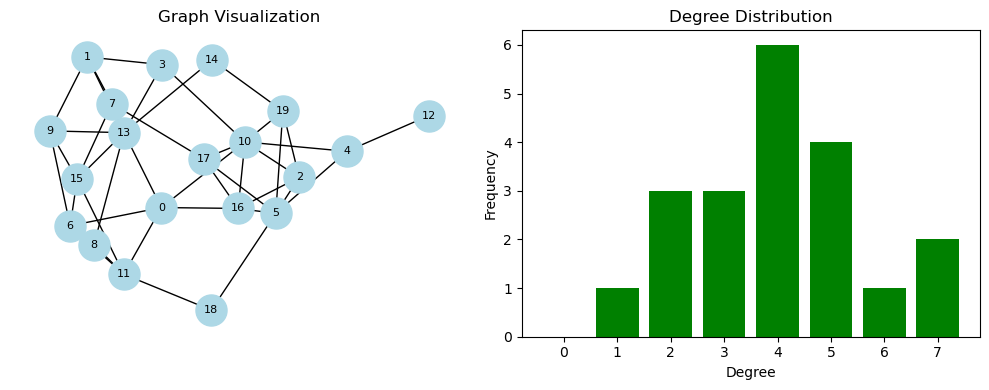

Nodes and their degrees: {0: 5, 1: 4, 2: 4, 3: 3, 4: 3, 5: 6, 6: 4, 7: 3, 8: 2, 9: 4, 10: 7, 11: 5, 12: 1, 13: 7, 14: 2, 15: 5, 16: 5, 17: 4, 18: 2, 19: 4}


In [5]:
# Example: Calculating and Visualizing Degree Distribution
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.erdos_renyi_graph(
    20, 0.2
)  # Random graph with 20 nodes and 20% connection probability

# Calculate degrees
degrees = [deg for node, deg in G.degree()]
degree_count = nx.degree_histogram(G)  # Frequency of each degree
deg_x = range(len(degree_count))  # Degree values
deg_y = degree_count  # Count of nodes with each degree

# Visualization of the graph
plt.figure(figsize=(10, 4))

# Subplot 1: Graph Visualization
plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color="lightblue", node_size=500, font_size=8)
plt.title("Graph Visualization")

# Subplot 2: Degree Distribution
plt.subplot(1, 2, 2)
plt.bar(deg_x, deg_y, color="green")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")

plt.tight_layout()
plt.show()

# Observations:
print("Nodes and their degrees:", dict(G.degree()))

### **Observations:**

1. The graph visualization shows the structure of connections between nodes.  
2. The histogram highlights the frequency of nodes with different degrees.  
3. Nodes with higher degrees may represent **hubs**, while nodes with degree 0 are isolated.  

---

## **Practice Activity:**

1. Create a graph with 30 nodes and a connection probability of 0.1 using NetworkX. (Use `seed=42` for reproducibility)  
2. Calculate the degree distribution and plot a histogram.  
3. Identify hubs and isolated nodes in your graph and analyze their significance.  


## 1.3 In-Degree and Out-Degree (Directed Graph Example)

Below, we’ll create a **directed** random graph using NetworkX’s `gnp_random_graph` (similar to Erdős–Rényi, but directed).
We’ll compute both in-degree and out-degree for each node.


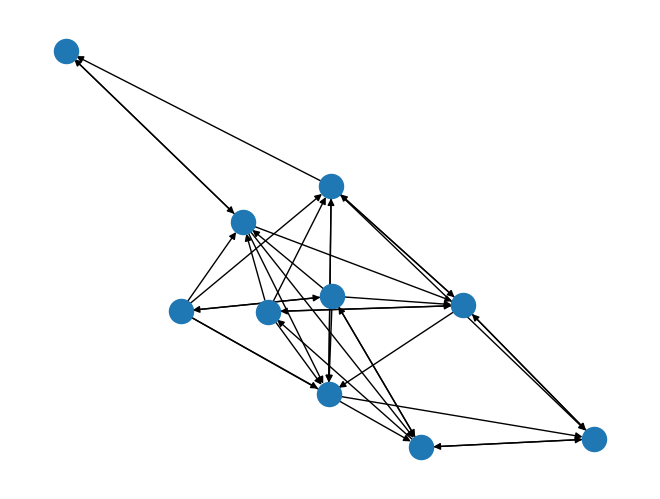

In [6]:
# Create a random directed graph
DG = nx.gnp_random_graph(n=10, p=0.3, directed=True, seed=42)
pos = nx.spring_layout(DG, seed=42)
nx.draw(DG, pos=pos)

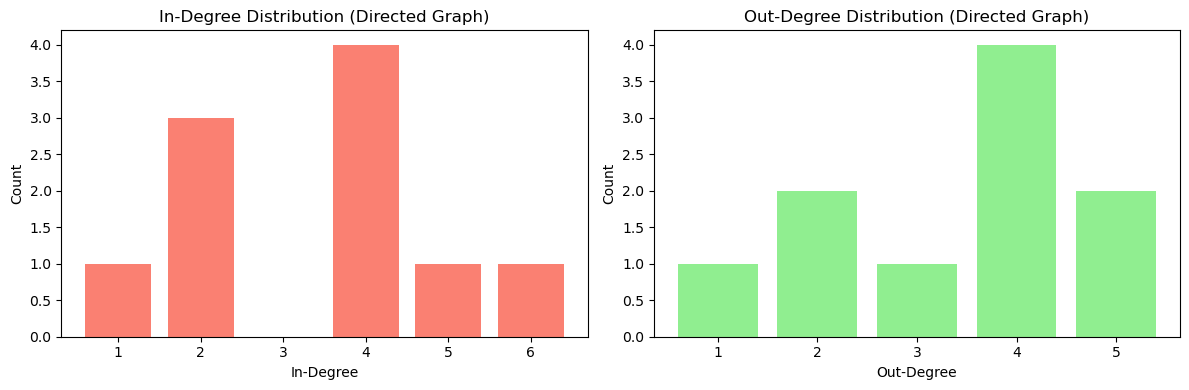

In-Degrees: [4, 2, 4, 2, 5, 1, 4, 4, 6, 2]
Out-Degrees: [4, 5, 3, 1, 4, 5, 2, 4, 2, 4]


In [7]:
# Compute in-degree and out-degree
in_degrees = [DG.in_degree(node) for node in DG.nodes()]
out_degrees = [DG.out_degree(node) for node in DG.nodes()]

# Visualize in-degree distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(
    in_degrees,
    bins=range(min(in_degrees), max(in_degrees) + 2),
    align="left",
    rwidth=0.8,
    color="salmon",
)
plt.title("In-Degree Distribution (Directed Graph)")
plt.xlabel("In-Degree")
plt.ylabel("Count")

# Visualize out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(
    out_degrees,
    bins=range(min(out_degrees), max(out_degrees) + 2),
    align="left",
    rwidth=0.8,
    color="lightgreen",
)
plt.title("Out-Degree Distribution (Directed Graph)")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("In-Degrees:", in_degrees)
print("Out-Degrees:", out_degrees)

### Observations (Directed Graph)

1. **In-degree** distribution tells you how many edges are coming into nodes. Nodes with high in-degree might be “targets” or very popular entities.  
2. **Out-degree** distribution shows how many edges go out from nodes. Nodes with high out-degree might be “sources” or very active entities.  
3. Compare the two distributions:
   - Are certain nodes high in both in-degree and out-degree?  
   - Which distribution is more skewed?


## 1.4 Practical Interpretation

- **High-degree nodes** often play critical roles (e.g., hubs in social networks, key routers in tech networks).  
- **Low-degree or isolated nodes** might represent fringe elements or potential points of vulnerability.  
- Degree distributions can hint at whether a network is:
  - **Random-like**: Degree distribution is closer to Poisson.  
  - **Something else** altogether.


## 1.5 Practice Activity: Degree Distribution Analysis

1. **Experiment with Graph Sizes and Probability**  
   - Increase `n` (e.g., 50, 100) and adjust `p` (e.g., 0.1, 0.5). Observe how the histogram changes.  
   - Record any patterns you notice (e.g., does the histogram become more peaked or more spread out?).

2. **Identify High-Degree Nodes**  
   - In your graph `G`, find the node(s) with the highest degree.  
   - Could these nodes be considered “hubs”?

3. **Compare Directed vs. Undirected**  
   - Create both an undirected and a directed graph with the same `(n, p)` settings.  
   - Compare in-degree, out-degree, and total degree distributions.

4. **Short Quiz**  
   - a) If a node’s degree is 0, what does that imply about its connectivity?  
   - b) In a directed graph, can a node have an out-degree of 0 but an in-degree of 5? Explain.  
   - c) What might be some **real-world** implications of finding a node with a very high degree in a network?


## 1.7 Wrap-Up

- You now know how to **compute and visualize node degrees** in both undirected and directed graphs.  
- Degree distributions **provide insight** into the structure of a network and can reveal the presence of hubs or isolated nodes.  
- In subsequent sections, we’ll explore **path-based metrics**, **clustering coefficients**, and implement these metrics in greater depth using Python.


# 2. Path-Based Metrics: Shortest Paths, Average Path Length

In this section, we will:
- Explore **shortest path** concepts (unweighted vs. weighted graphs)  
- Compute **average path length** (or average shortest path)  
- Understand related metrics like **network diameter** and **eccentricity**  
- Use Python (NetworkX) to implement and visualize path-based metrics


## 2.1 Key Definitions

- **Path**: A sequence of edges which connect a sequence of distinct nodes.  
- **Path Length**: The number of edges (unweighted) or sum of edge weights (weighted) in a path.  
- **Shortest Path**: The path between two nodes that has the minimum total length (or weight).  
- **Eccentricity** (of a node): The greatest distance from that node to any other node in the network.  
- **Diameter** (of a network): The maximum eccentricity among all nodes (i.e., the longest of all the shortest paths).  
- **Radius** (of a network): The minimum eccentricity among all nodes.  
- **Average Path Length**: The average of shortest path lengths taken over all pairs of nodes in a network.


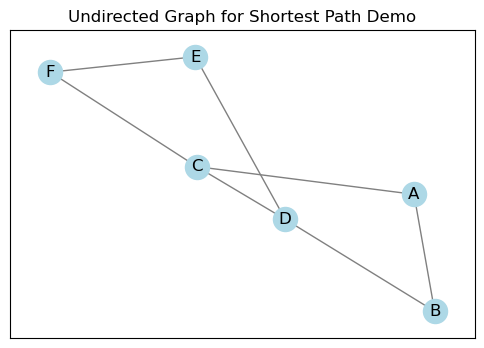

Shortest path from A to F: ['A', 'C', 'F']
Number of edges in this shortest path: 2


In [8]:
# 2.2 Practice Activity: Building a Small Undirected Graph and Finding Shortest Paths

import networkx as nx
import matplotlib.pyplot as plt

# Create a small undirected graph
G = nx.Graph()
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("C", "D"),
    ("D", "E"),
    ("E", "F"),
    ("C", "F"),
]
G.add_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Position nodes for consistent layout
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray"
)
plt.title("Undirected Graph for Shortest Path Demo")
plt.show()

# Let's pick two nodes and compute the shortest path
source, target = "A", "F"
shortest_path = nx.shortest_path(G, source=source, target=target)
path_length = nx.shortest_path_length(G, source=source, target=target)

print(f"Shortest path from {source} to {target}: {shortest_path}")
print(f"Number of edges in this shortest path: {path_length}")

In [9]:
# Connet A and E
G.add_edges_from([("A", "E")])
shortest_path = nx.shortest_path(G, source=source, target=target)
path_length = nx.shortest_path_length(G, source=source, target=target)

print(f"Shortest path from {source} to {target}: {shortest_path}")
print(f"Number of edges in this shortest path: {path_length}")

Shortest path from A to F: ['A', 'E', 'F']
Number of edges in this shortest path: 2


### Observations (Undirected Graph)
1. The **visualization** shows a small network of 6 nodes.  
2. By using `nx.shortest_path()`, we obtain not only the path itself but also how many edges it includes (`nx.shortest_path_length()`).  
3. Changing `source` and `target` can yield different paths and lengths.


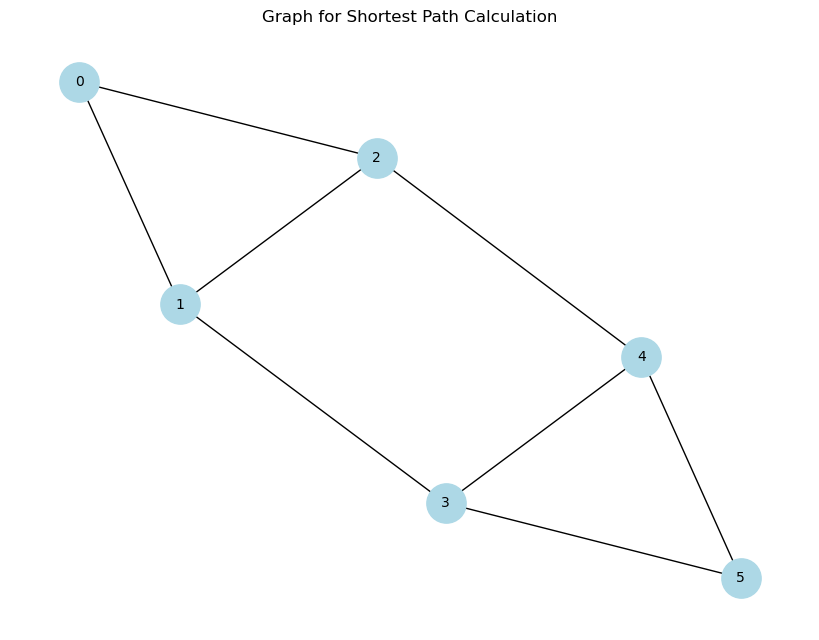

Shortest path from 0 to 5: [0, 1, 3, 5]


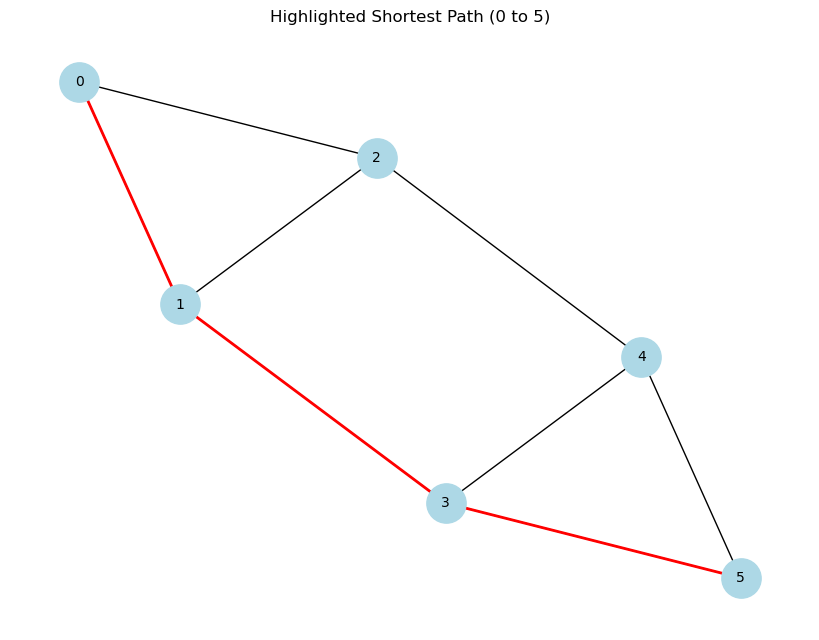

In [10]:
# Example: Shortest Path Calculation
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 5)])

# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.title("Graph for Shortest Path Calculation")
plt.show()

# Compute shortest path
shortest_path = nx.shortest_path(G, source=0, target=5)
print("Shortest path from 0 to 5:", shortest_path)

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
plt.title("Highlighted Shortest Path (0 to 5)")
plt.show()

### **Observations:**
1. The graph visualization shows the connections between nodes.  
2. The shortest path is highlighted in red, showing the most efficient route.  
3. The output confirms the sequence of nodes forming the shortest path.  

---


## 2.3 Weighted Graph Example

Here, we assign weights to edges and see how the **weighted shortest path** might differ from the unweighted case.


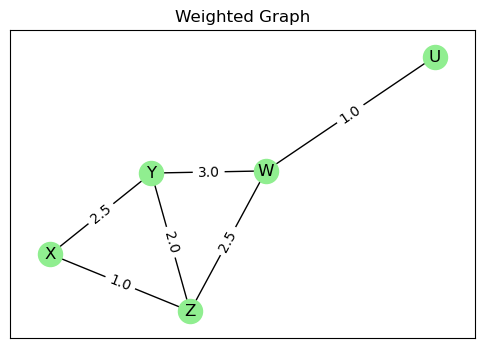

Shortest path (weighted) from X to U: ['X', 'Z', 'W', 'U']
Total weight of this shortest path: 4.5


In [11]:
# Create a weighted undirected graph
WG = nx.Graph()
WG.add_weighted_edges_from(
    [
        ("X", "Y", 2.5),
        ("X", "Z", 1.0),
        ("Y", "Z", 2.0),
        ("Y", "W", 3.0),
        ("Z", "W", 2.5),
        ("W", "U", 1.0),
    ]
)


# Visualize the weighted graph
pos_wg = nx.spring_layout(WG, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(WG, pos=pos_wg, with_labels=True, node_color="lightgreen")
edge_labels = nx.get_edge_attributes(WG, "weight")
nx.draw_networkx_edge_labels(WG, pos_wg, edge_labels=edge_labels)
plt.title("Weighted Graph")
plt.show()

# Compute the shortest path by weight
source, target = "X", "U"
shortest_weighted_path = nx.shortest_path(
    WG, source=source, target=target, weight="weight"
)
path_length_weighted = nx.shortest_path_length(
    WG, source=source, target=target, weight="weight"
)

print(f"Shortest path (weighted) from {source} to {target}: {shortest_weighted_path}")
print(f"Total weight of this shortest path: {path_length_weighted}")

In [12]:
# add distance = 1 / weight
distances = {(u, v): 1 / d["weight"] for u, v, d in WG.edges(data=True)}
nx.set_edge_attributes(WG, distances, "distance")
shortest_path_weighted = nx.shortest_path(
    WG, source=source, target=target, weight="distance"
)
path_length_weighted = nx.shortest_path_length(
    WG, source=source, target=target, weight="distance"
)

print(f"Shortest path (weighted) from {source} to {target}: {shortest_path_weighted}")
print(f"Total weight of this shortest path: {path_length_weighted}")

Shortest path (weighted) from X to U: ['X', 'Y', 'W', 'U']
Total weight of this shortest path: 1.7333333333333334


### Observations (Weighted Graph)
1. **Edge Labels**: You can see each edge’s weight (e.g., 2.5, 1.0, etc.) on the plot.  
2. **Shortest Path Calculation**: `nx.shortest_path()` with `weight='weight'` finds a path that minimizes the **sum of weights**, not just the number of edges.  
3. Compare the weighted path to an unweighted approach. Sometimes the path with fewer edges is not necessarily the one with the smallest total weight.


## Practice Activity: Weighted Graphs

1. Change the weight of the edge between X and Y to 10. What happens to the shortest path?

## 2.4 Average Path Length, Diameter, and Eccentricity

We can explore **global metrics** using NetworkX:
- `nx.average_shortest_path_length(G)` (for connected graphs)  
- `nx.diameter(G)`  
- `nx.eccentricity(G)`  

Let's compute these for our first (undirected) graph `G`.


In [13]:
# Ensure the graph is connected
# If not connected, these metrics might raise errors or only be valid on the largest component

if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
    diam = nx.diameter(G)
    ecc = nx.eccentricity(G)
    print("The graph is connected.")
    print(f"Average Path Length: {avg_path_len:.2f}")
    print(f"Diameter: {diam}")
    print("Eccentricities:", ecc)
else:
    print(
        "Graph G is not fully connected. Average path length, diameter, and eccentricity require a connected graph."
    )

The graph is connected.
Average Path Length: 1.53
Diameter: 3
Eccentricities: {0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 3}


### Observations
1. **Average Path Length**: Gives an idea of how many “steps” (edges) it takes on average to travel between any two nodes.  
2. **Diameter**: The longest of the shortest paths in the graph. If the diameter is small, the network is said to be more “compact” or “small-world.”  
3. **Eccentricity**: Each node’s maximum distance to any other node. Nodes with low eccentricity are more centrally located.


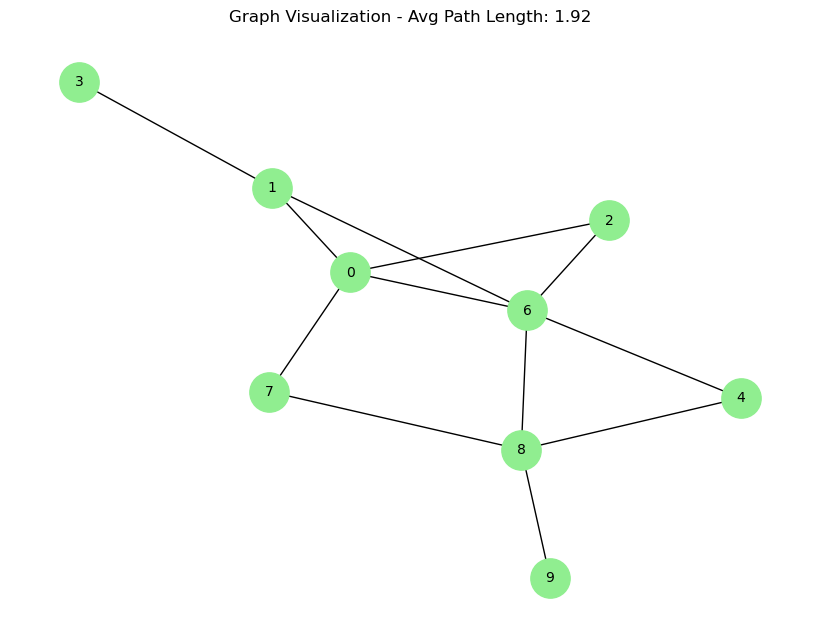

Average Path Length: 1.92


In [14]:
# Example: Calculating Average Path Length
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph
G = nx.erdos_renyi_graph(10, 0.3)  # Random graph with 10 nodes and 30% edge probability

# If the graph is not connected, take the largest connected component
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()

# Compute average path length
avg_path_length = nx.average_shortest_path_length(G)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightgreen", node_size=800, font_size=10)
plt.title(f"Graph Visualization - Avg Path Length: {avg_path_length:.2f}")
plt.show()

print(f"Average Path Length: {avg_path_length:.2f}")

### **Observations:**
1. The visualization shows the structure of the network.  
2. The average path length provides insights into how quickly information can spread across the network.  
3. A lower average path length often implies better connectivity.  

---


## 2.5 Practice Activities

1. **Experiment with Different Graphs**  
   - Create a larger **Erdős–Rényi** random graph (e.g., `n=10, p=0.4` or `n=15, p=0.3`) and compute:
     - Shortest path between two chosen nodes  
     - Average path length, diameter, and eccentricity (if connected)
   - If your graph isn’t fully connected, consider only the **largest connected component** by using `nx.subgraph()` or a function like `nx.connected_components()`.

2. **Directed Graph Challenge**  
   - Build a **directed** graph (DiGraph).  
   - Use `nx.shortest_path()` to find paths (directed edges) between nodes.  
   - If edges have weights, make sure to specify `weight='weight'`.

3. **Weighted Graph Analysis**  
   - For a weighted graph, compute **average shortest path length** using `weight='weight'`.  
   - Observe how different weights affect the path choices vs. an unweighted approach.

4. **Quiz**  
   - a) Define the term *diameter* of a graph.  
   - b) What is the difference between *BFS (Breadth-First Search)* and *Dijkstra’s algorithm*?  
   - c) If your graph has multiple components, how can you handle metrics like *average path length* or *diameter*?


## 2.7 Wrap-Up

- We covered **shortest path** algorithms for both unweighted and weighted graphs.  
- Explored **global metrics** like **average path length** and **diameter**, which describe how well-connected the entire network is.  
- In future sections, we’ll see how these metrics combine with **clustering** and **node-level** measures to form a deeper understanding of network structure.


# 3. Clustering Coefficient and Its Interpretation

In this section, we will:
- Define the **local** and **global** clustering coefficients  
- Compute these coefficients in Python (NetworkX)  
- Visualize and interpret clustering coefficient results for a given network  
- Relate clustering to the **small-world phenomenon** and “cliquishness” in real-world networks


## 3.1 Key Concepts

- **Local Clustering Coefficient** (LCC): For a node \( v \), it measures how many of \( v \)’s neighbors are also neighbors with each other. Formally, it’s the fraction of possible edges among \( v \)’s neighbors that actually exist.  

- **Global Clustering Coefficient**: Often defined as the average local clustering coefficient across all nodes.

- **Transitivity**: A global measure of clustering defined as the ratio of closed triplets (triangles) to all connected triplets (three nodes connected by two or three edges). It captures the overall likelihood that two neighbors of a node are connected.

- **Significance**:
  - High clustering indicates that nodes tend to form tightly-knit groups (many triangles).  
  - Low clustering suggests a more “tree-like” or sparse triadic structure.

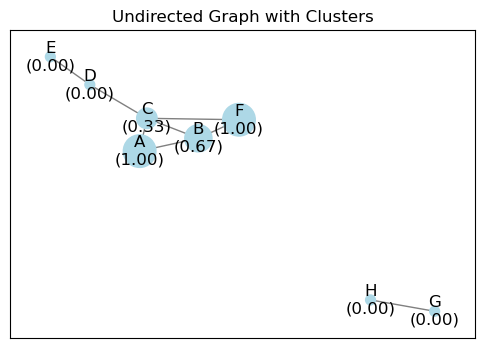

Local Clustering Coefficients:
  A: 1.00
  B: 0.67
  C: 0.33
  D: 0.00
  E: 0.00
  F: 1.00
  G: 0.00
  H: 0.00

Global Clustering Coefficient (average): 0.38


In [15]:
# 3.2 Practice Activity: Build a Small Undirected Graph and Compute Clustering Coefficients

import networkx as nx
import matplotlib.pyplot as plt

# Create a small undirected graph with some triangles (cliques)
G = nx.Graph()
edges = [
    ("A", "B"),
    ("B", "C"),
    ("A", "C"),  # Triangle among A, B, C
    ("C", "D"),
    ("D", "E"),  # Chain out to E
    ("B", "F"),
    ("C", "F"),  # Another small cluster involving F
    ("G", "H"),  # A separate component for demonstration
]
G.add_edges_from(edges)

# Compute local clustering for each node
local_clust = nx.clustering(G)

# Create node labels with clustering coefficients
node_labels = {node: f"{node}\n({coeff:.2f})" for node, coeff in local_clust.items()}

# Scale node sizes based on clustering coefficients
node_sizes = [coeff * 500 + 50 for coeff in local_clust.values()]

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout for consistency
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    labels=node_labels,
    node_size=node_sizes,
    node_color="lightblue",
    edge_color="gray",
)
plt.title("Undirected Graph with Clusters")
plt.show()

# Print clustering coefficients
print("Local Clustering Coefficients:")
for node, coeff in local_clust.items():
    print(f"  {node}: {coeff:.2f}")

# Compute global clustering coefficient (average of local clustering)
global_clust = nx.average_clustering(G)
print(f"\nGlobal Clustering Coefficient (average): {global_clust:.2f}")

### Observations

1. **Local Clustering Coefficients**:
   - Nodes within the triangle (A, B, C) are likely to have **clustering coefficient = 1** (fully connected neighbors).  
   - Nodes at the “chain” end (e.g., D or E) often have lower clustering if their neighbors are not interconnected.

2. **Separate Component** (G, H):
   - Notice G and H are only connected to each other and not to the rest. This affects local clustering if their neighbors form no triangles.

3. **Global Clustering Coefficient**:
   - An average value near 1 indicates **high** clustering overall, while near 0 indicates **low** clustering.  
   - In real networks, typical clustering is somewhere in between, but often significantly higher than random-network expectations.


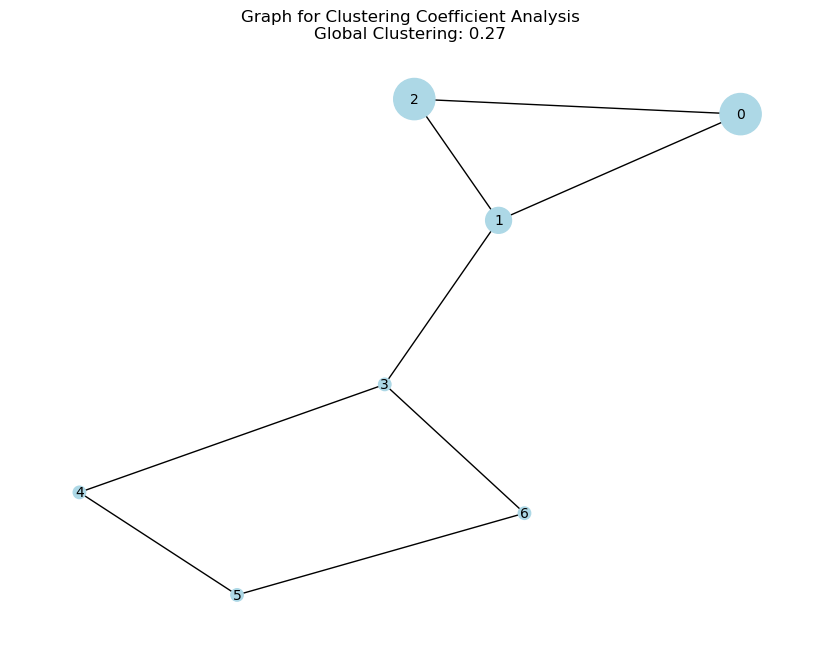

Local Clustering Coefficients: {0: 1.0, 1: 0.3333333333333333, 2: 1.0, 3: 0, 4: 0, 5: 0, 6: 0}
Global Clustering Coefficient: 0.2727272727272727


In [16]:
# Example: Calculating Clustering Coefficient
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6), (6, 3)])

# Compute clustering coefficients
local_clustering = nx.clustering(G)  # Local clustering coefficients
global_clustering = nx.transitivity(G)  # Global clustering coefficient
node_sizes = [coeff * 800 + 80 for coeff in local_clustering.values()]
# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=node_sizes, font_size=10)
plt.title(
    f"Graph for Clustering Coefficient Analysis\nGlobal Clustering: {global_clustering:.2f}"
)
plt.show()

print("Local Clustering Coefficients:", local_clustering)
print("Global Clustering Coefficient:", global_clustering)

### **Observations:**

1. The graph visualization highlights the connections among nodes.  
2. The **local clustering coefficient** shows how tightly connected each node's neighbors are.  
3. The **global clustering coefficient** provides a measure of the overall network cohesiveness.  



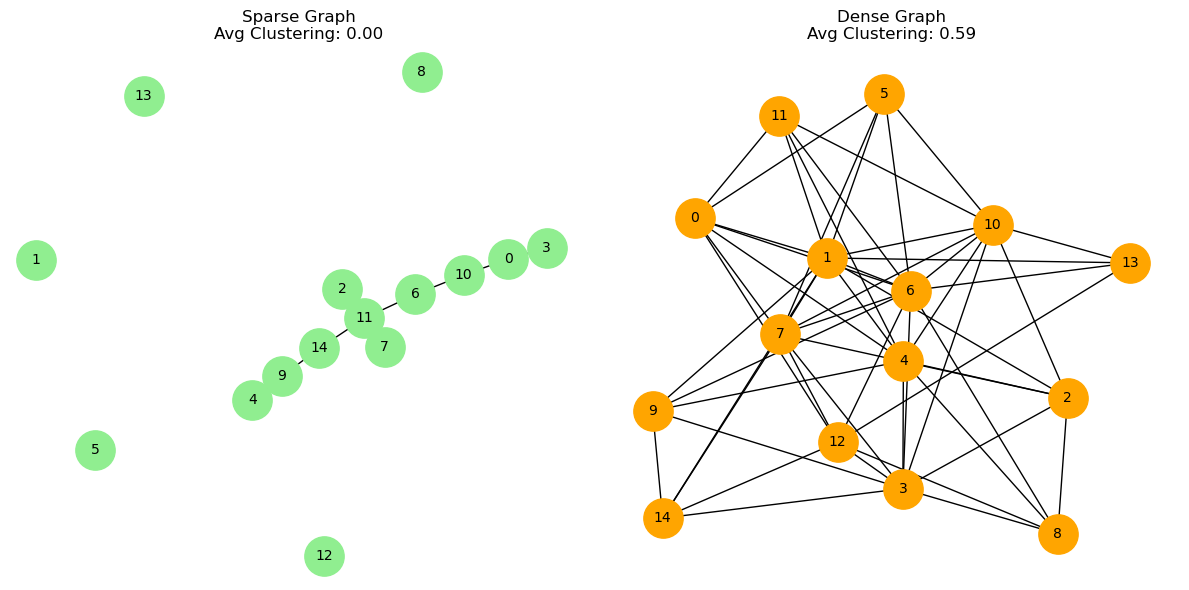

In [17]:
# Example: Comparing Clustering in Sparse and Dense Networks
import networkx as nx
import matplotlib.pyplot as plt

# Sparse Graph
G_sparse = nx.erdos_renyi_graph(15, 0.1)  # Low edge probability
sparse_clustering = nx.average_clustering(G_sparse)

# Dense Graph
G_dense = nx.erdos_renyi_graph(15, 0.5)  # High edge probability
dense_clustering = nx.average_clustering(G_dense)

# Visualize Sparse Graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(
    G_sparse, with_labels=True, node_color="lightgreen", node_size=800, font_size=10
)
plt.title(f"Sparse Graph\nAvg Clustering: {sparse_clustering:.2f}")

# Visualize Dense Graph
plt.subplot(1, 2, 2)
nx.draw(G_dense, with_labels=True, node_color="orange", node_size=800, font_size=10)
plt.title(f"Dense Graph\nAvg Clustering: {dense_clustering:.2f}")

plt.tight_layout()
plt.show()

### **Observations:**

1. Sparse graphs have a lower clustering coefficient, indicating fewer connections among neighbors.  
2. Dense graphs exhibit higher clustering coefficients, revealing tightly-knit communities.  
3. The visualization helps compare clustering properties directly between network types.  


## 3.3 Another Example with a Random Graph

We can compare the clustering coefficient of a real or manually constructed graph to that of a random graph (Erdős–Rényi model).


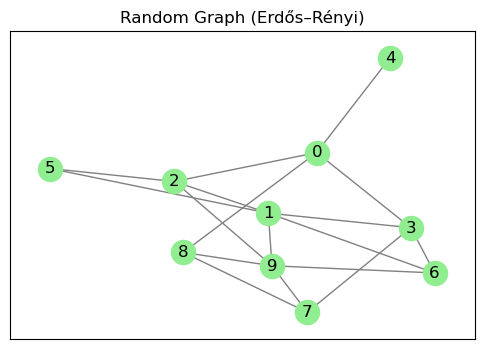

Local Clustering (Random Graph):
  0: 0.00
  1: 0.40
  2: 0.33
  3: 0.17
  4: 0.00
  5: 1.00
  6: 0.67
  7: 0.33
  8: 0.33
  9: 0.30

Global Clustering (Random Graph): 0.35


In [18]:
# Create a random graph with 10 nodes, edge probability 0.3
RG = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)

# Compute local and global clustering on the random graph
local_clust_RG = nx.clustering(RG)
global_clust_RG = nx.average_clustering(RG)

# Visualize the random graph
pos_RG = nx.spring_layout(RG, seed=42)
plt.figure(figsize=(6, 4))
nx.draw_networkx(
    RG, pos=pos_RG, with_labels=True, node_color="lightgreen", edge_color="gray"
)
plt.title("Random Graph (Erdős–Rényi)")
plt.show()

print("Local Clustering (Random Graph):")
for node, coeff in local_clust_RG.items():
    print(f"  {node}: {coeff:.2f}")

print(f"\nGlobal Clustering (Random Graph): {global_clust_RG:.2f}")

### Observations (Random Graph)
1. **Local Clustering** values typically vary: some nodes might have 0 (no or few interconnected neighbors).  
2. The **Global Clustering** is often lower than in a graph with many intentional triangles, unless \( p \) is high.  
3. As \( n \) grows large and \( p \) remains fixed, the clustering coefficient in an Erdős–Rényi graph is expected to be around \( p \).


## 3.4 Significance of Clustering in Real-World Networks

- **Social Networks**: High clustering due to “friend-of-a-friend” ties.  
- **Biological Networks**: Proteins in the same functional group often have higher clustering.  
- **Technological Networks**: Certain network topologies (e.g., mesh networks) can exhibit moderate or high clustering.

**Small-World Phenomenon** (Watts–Strogatz model):
- High clustering + low average path length
- Common in many real-world networks (people, power grids, neuronal networks, etc.)


## 3.5 Practice Activities

1. **Custom Graph**  
   - Build your own undirected graph with at least 8 nodes. Include at least one triangle or complete subgraph.  
   - Compute the local clustering for each node and the global clustering.  
   - Visualize the graph and identify which nodes have the highest clustering.

2. **Comparative Analysis**  
   - Compare **average clustering** between your custom graph and a random graph of the same size (same number of nodes, similar edge count).  
   - Which one has a higher global clustering?

3. **Directed Graph Variation**  
   - Note that **NetworkX** has a function `nx.clustering` for undirected graphs. For directed graphs, you might look into `nx.algorithms.cluster.clustering` (it’s generally for undirected, but can also compute a directed version if needed).  
   - Try building a directed graph and see how clustering is defined or computed.

4. **Quiz**  
   - a) What does a local clustering coefficient of 1 imply for a node’s neighbors?  
   - b) How does the global clustering coefficient relate to local clustering values?  
   - c) Why might social networks tend to have higher clustering than random graphs?


## 3.7 Wrap-Up

- We learned how to compute **local** and **global** clustering using NetworkX.  
- Clustering coefficients help reveal the “cliquishness” or presence of **triadic closures**.  
- High clustering is often associated with **small-world** properties, especially when combined with a relatively short average path length.  
- Next, we’ll see how to implement these metrics together or apply them to larger, real-world datasets.


# 4. Hands-On Implementation of Metrics Using Python Libraries

In this section, we will:
- **Combine** degree, path-based, and clustering metrics in one workflow  
- **Generate** or load a sample network and compute all key metrics  
- **Visualize** results (e.g., histograms, network plots)  
- **Discuss** interpretations of these metrics in a unified context


## **Practice Activity:**

1. Create a new Erdős–Rényi **DIRECTED** graph with 5800 nodes and a connection probability of 0.001. (`G = nx.gnp_random_graph(n=5800, p=0.001, directed=True)`)
2. Compute and visualize the following metrics:  
   - Degree distribution  
   - Distribution of shortest path lengths  
   - Clustering coefficients (local and global)  



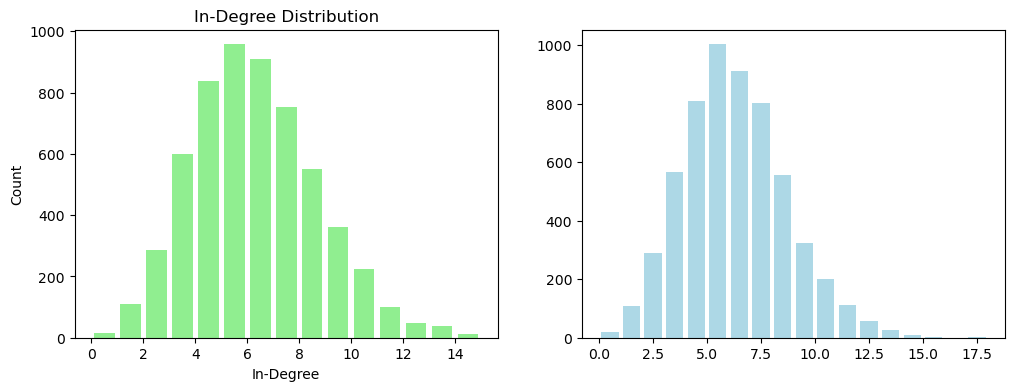

In [19]:
...
P = nx.gnp_random_graph(n=5_800, p=0.001, directed=True)
in_degrees = [val for (_, val) in P.in_degree()]
out_degrees = [val for (_, val) in P.out_degree()]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(
    in_degrees, bins=range(0, max(in_degrees) + 1), color="lightgreen", rwidth=0.8
)
ax[0].set_title("In-Degree Distribution")
ax[0].set_xlabel("In-Degree")
ax[0].set_ylabel("Count")
ax[1].hist(
    out_degrees, bins=range(0, max(out_degrees) + 1), color="lightblue", rwidth=0.8
);

In [20]:
# sortest length distribution
import random

lengths = []
n_failures = 0
for _ in range(100_000):
    source = random.choice(list(G.nodes()))
    target = random.choice(list(G.nodes()))
    if source != target:
        try:
            path = nx.shortest_path(G, source=source, target=target)
            lengths.append(len(path) - 1)
        except nx.NetworkXNoPath:
            n_failures += 1

length_counts = pd.Series(lengths).value_counts()
print(f"length counts: {length_counts}")

length counts: 1    32651
2    24686
3    20044
4     8234
Name: count, dtype: int64


<Axes: >

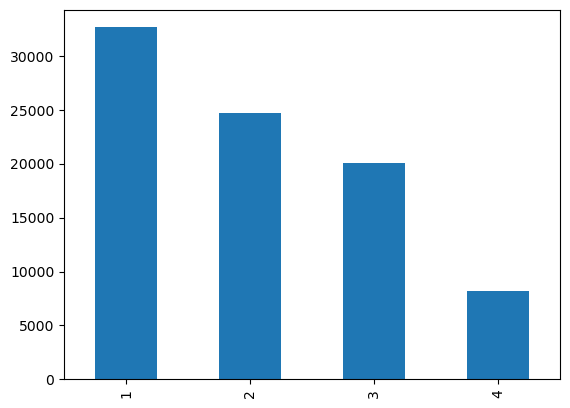

In [21]:
length_counts.plot.bar()

## Real-world example: Bitcoin OTC network
### Dataset Preview
The DataFrame `df` should have columns:
- `source`: user ID giving the rating
- `target`: user ID receiving the rating
- `rating`: an integer from -10 to +10
- `time`: timestamp (optional for our current analysis)

We’ll now build a **directed** graph with **weighted, signed edges**.


In [22]:
import pandas as pd
import networkx as nx

# Option 1: If your CSV file has no headers:
#   - Use header=None and specify column names directly
df = pd.read_csv(
    csv_file_path,
    header=None,
    names=["source", "target", "rating", "timestamp"],
)

# Option 2: If your CSV file does have headers but they are named differently:
#   - Replace "colA", "colB", "colC" with the actual column names from your CSV
# df.rename(columns={"colA": "source", "colB": "target", "colC": "rating"}, inplace=True)

# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame
for _, row in df.iterrows():
    src = row["source"]
    dst = row["target"]
    w = row["rating"]
    # Store the rating as an edge attribute called 'weight'
    G.add_edge(src, dst, weight=w)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 5881
Number of edges: 35592



### Observations

- **Nodes** represent individual users on the Bitcoin OTC platform.  
- **Edges** represent trust or distrust scores (from -10 to +10).  
- This is a **directed** graph because user A’s rating of user B doesn’t imply user B rates user A.

We’ll now explore **basic network properties** like **degree distribution**, **path-based metrics**, and **clustering**.


In [23]:
df
sel_6_2 = (df["source"] == 6) & (df["target"] == 2)
sel_2_6 = (df["source"] == 2) & (df["target"] == 6)
df.loc[sel_6_2 | sel_2_6]

,source,target,rating,timestamp
0,6,2,4,1.289242e+09
13366,2,6,5,1.347123e+09


There are edges between every pair of nodes, but the weights are not necessarily symmetric.

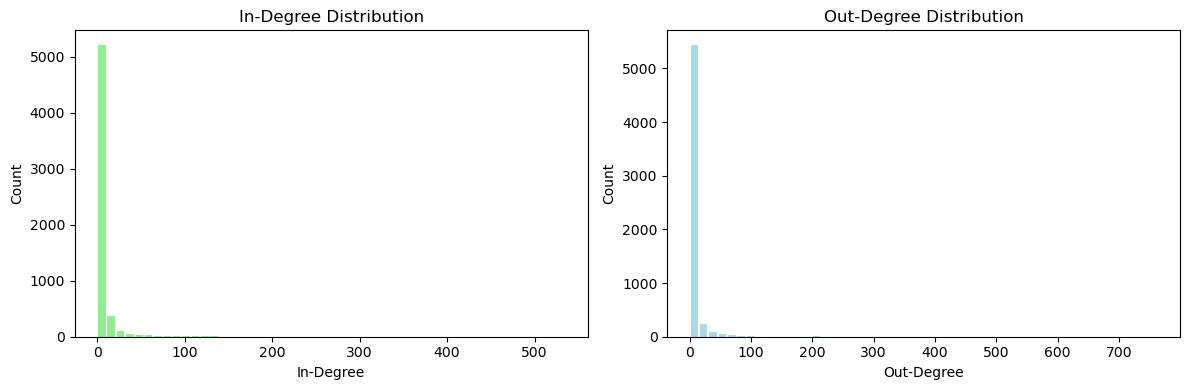

Average in-degree: 6.052031967352491
Average out-degree: 6.052031967352491


In [24]:
# In-degree and out-degree
in_degrees = [val for (_, val) in G.in_degree()]
out_degrees = [val for (_, val) in G.out_degree()]

# Histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=50, color="lightgreen", rwidth=0.8)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=50, color="lightblue", rwidth=0.8)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Quick stats
print("Average in-degree:", sum(in_degrees) / len(in_degrees))
print("Average out-degree:", sum(out_degrees) / len(out_degrees))

length counts: 1    32651
2    24686
3    20044
4     8234
Name: count, dtype: int64


Text(0.5, 1.0, 'Average shortest path length: 3.71')

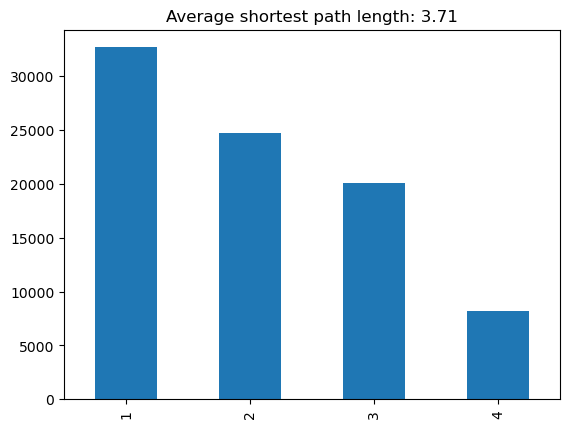

In [25]:
import numpy as np

distances = []
for _ in range(100_000):
    source = random.choice(list(G.nodes()))
    target = random.choice(list(G.nodes()))
    if source != target:
        try:
            path = nx.shortest_path(G, source=source, target=target)
            distances.append(len(path) - 1)
        except nx.NetworkXNoPath:
            n_failures += 1

length_counts = pd.Series(lengths).value_counts()
print(f"length counts: {length_counts}")
ax = length_counts.plot.bar()
ax.set_title(f"Average shortest path length: {np.mean(distances):.2f}")


### Observations (Degree Distribution)
1. **In-Degree**: How many incoming trust ratings each user receives. Some users may be rated by many others.  
2. **Out-Degree**: How many distinct ratings a user gives to others.  
3. In real user-generated networks, degree distributions may be **skewed** (few users with very high degree).


Compare the in-degree and out-degree distributions between the Bitcoin OTC network and the Erdős–Rényi graph.

## 4. Path-Based Metrics: Shortest Paths, Average Path Length

In [26]:
# Because it's potentially large and possibly disconnected,
# we'll focus on the largest weakly connected component (WCC)
# for path-based metrics in a directed graph.
if nx.is_empty(G):
    print("Graph is empty!")
else:
    # Extract largest weakly connected component (for a directed graph)
    wccs = list(nx.weakly_connected_components(G))

    largest_wcc = max(wccs, key=len)
    W = G.subgraph(largest_wcc).copy()

    print("Size of the largest weakly connected component:", W.number_of_nodes())

    # Strongly connected component
    sccs = list(nx.strongly_connected_components(G))
    largest_scc = max(sccs, key=len)
    H = G.subgraph(largest_scc).copy()
    print("Size of the largest strongly connected component:", H.number_of_nodes())

    # If the subgraph is still large, we might skip certain computations or only sample.
    if H.number_of_nodes() < 6000:  # arbitrary threshold for demonstration
        # Compute average shortest path length for the subgraph
        avg_path_len = nx.average_shortest_path_length(H)
        print(f"Average shortest path length (Largest WCC): {avg_path_len:.2f}")

        # Potentially, we can also check diameter (longest of the shortest paths)
        diam = nx.diameter(H)
        print(f"Diameter (Largest WCC): {diam}")
    else:
        print("Subgraph too large for average path length or diameter demonstration.")

Size of the largest weakly connected component: 5875
Size of the largest strongly connected component: 4709
Average shortest path length (Largest WCC): 3.68
Diameter (Largest WCC): 11


In [27]:
# let's compute the layout for the largest strongly connected component
pos = nx.spring_layout(H, seed=42)  # ~ 20 seconds to compute

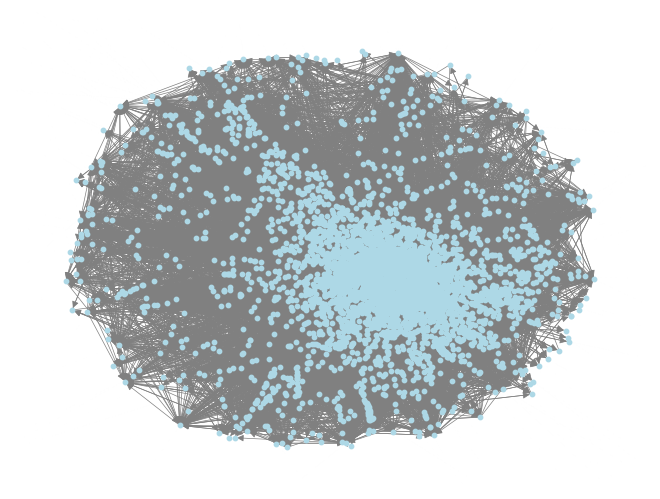

In [28]:
nx.draw(
    H,
    pos=pos,
    with_labels=False,
    node_size=10,
    node_color="lightblue",
    edge_color="gray",
    width=0.5,
)  # ~ minute to draw


### Observations (Paths)
- **Weakly Connected Component**: In a directed graph, a WCC is where each node is reachable from any other if we ignore edge direction.  
- **Average Path Length**: Indicates how many “steps” on average separate two users.  
- **Diameter**: The maximum distance among all shortest paths—useful for checking how “wide” the network is.  
- Large networks can be computationally heavy, so sampling or focusing on subgraphs is often necessary.

## 5. Clustering Coefficient (Signed Graph Considerations)

In [29]:
# NetworkX's default clustering methods are for undirected graphs.
# For a directed graph, we can still compute the 'clustering' via G.to_undirected()
# But it won't account for sign (positive/negative edges).
# We'll do a quick demonstration ignoring the sign for now.

U = H.to_undirected()

# Calculate average clustering on the largest WCC (as an undirected view)
avg_clust = nx.average_clustering(U)
print(f"Average clustering (undirected view): {avg_clust:.2f}")

# For a local view, let's compute the clustering of a few random nodes
import random

sample_nodes = random.sample(list(U.nodes()), min(5, U.number_of_nodes()))
for node in sample_nodes:
    print(f"Local clustering of {node}:", nx.clustering(U, node))

Average clustering (undirected view): 0.20
Local clustering of 321.0: 0.3333333333333333
Local clustering of 3857.0: 0.16666666666666666
Local clustering of 5811.0: 0.6190476190476191
Local clustering of 242.0: 0.0718954248366013
Local clustering of 2608.0: 0



### Observations (Clustering)
1. **Ignoring Edge Sign**: Standard clustering calculations generally focus on whether nodes are connected, not the weight/sign.  
2. **Interpreting**: A higher clustering coefficient often indicates tighter “triangles” (people rating each other).  
3. **Signed Graph**: If we want truly signed clustering measures, we may need specialized algorithms or libraries that handle negative edges differently.


## 7. Summary

This **Bitcoin OTC weighted signed network** is an ideal **real-life example** for:
- **Degree Distribution**: Trust out-degree (how many users a person rates) vs. in-degree (how many ratings they receive).  
- **Path-Based Metrics**: Checking average path length or diameter, focusing on the largest weakly connected component.  
- **Clustering Coefficient**: For a quick look at triadic closure, though sign-specific analysis would require advanced methods.  
- **Visualization**: Distinguishing positive vs. negative edges can highlight trust clusters vs. potential conflicts.



# Home assignment

1. Create an undirected, unweighted graph from the Bitcoin OTC dataset.
2. Compute the following metrics:
   - Degree distribution
   - Shortest path and average path length
   - Clustering coefficients (local and global)
**Report these numbers, provide a plot of the degree distribution, and the average path length.**

3. Write a loop that:
 - identifies the most connected node and removes it from the graph. If two nodes have the same degree, remove the one with the lowest ID.
 - computes the average path length after each removal.
 - stores the results in a list.
 - repeat this process for 100 iterations.

 4. Write another loop that does the same, but instead of removing the most connected node, it removes a random node.

 5. Plot the shortest path length as a function of the number of removed nodes, for each of the two cases (removing the most connected node and a random node).

 6. What are your conclusions from the plots? Write in 2-3 sentences.



